In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg
from functions import *
%matplotlib inline

In [2]:
def grad_U(Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    return eta * (reg * Ui - Vj * (Yij - np.dot(Ui, Vj)))

In [3]:
def grad_V(Vj, Yij, Ui, reg, eta):    
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    return eta * (reg * Vj - Ui * (Yij - np.dot(Ui, Vj)))

In [4]:
def get_err(U, V, Y, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    err = 0
    for y in Y:
        err += (y[2] - np.dot(U[y[0] - 1], V[y[1] - 1]))**2
    err /= 2.0
    err += (reg / 2) * (np.linalg.norm(U)**2 + np.linalg.norm(V)**2)
    err /= len(Y)
    
    return err

In [5]:
def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV^T)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    # epoch counter and initial matrices
    k = 0
    U = np.random.random_sample((M, K)) - 0.5
    V = np.random.random_sample((N, K)) - 0.5
    err = 0
    erri = 0
    
    # Start the epoch runs
    while(k < max_epochs):
        
        # random permutation of the indices
        inds = np.arange(len(Y))
        np.random.shuffle(inds)
        
        # run on epoch
        for y in inds:
            i,j,v = Y[y][0] - 1, Y[y][1] - 1, Y[y][2]
            temp_u, temp_v = np.copy(U[i]), np.copy(V[j])
            U[i] -= grad_U(temp_u, v, temp_v, reg, eta)
            V[j] -= grad_V(temp_v, v, temp_u, reg, eta)
        
        
        
        # Compute new error
        new_error = get_err(U, V, Y)
        # Break if error less than eps.
        if (k==0):
            err = new_error
            erri = new_error
        elif((err - new_error) / erri < eps):
            break
        else:
            err = new_error
            
        # increment counter
        k += 1
    
    # return MSE and UV
    return (U, V, err)

In [6]:
# Load Data
Y_train = np.loadtxt('data/train.txt').astype(int)
Y_test = np.loadtxt('data/test.txt').astype(int)
M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
print("Factorizing with ", M, " users, ", N, " movies.")

('Factorizing with ', 943, ' users, ', 1682, ' movies.')


In [7]:
reg = 0.1
eta = 0.03 # learning rate
K = 20

U,V, E_in = train_model(M, N, K, eta, reg, Y_train)
E_out = get_err(U, V, Y_test)

PLOT

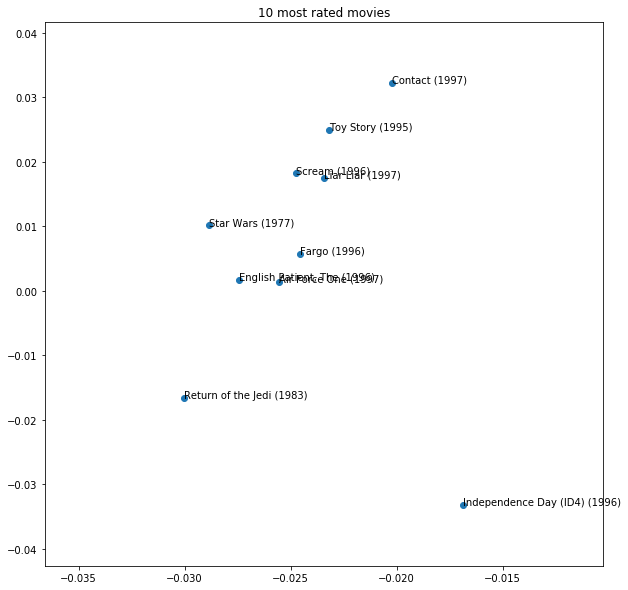

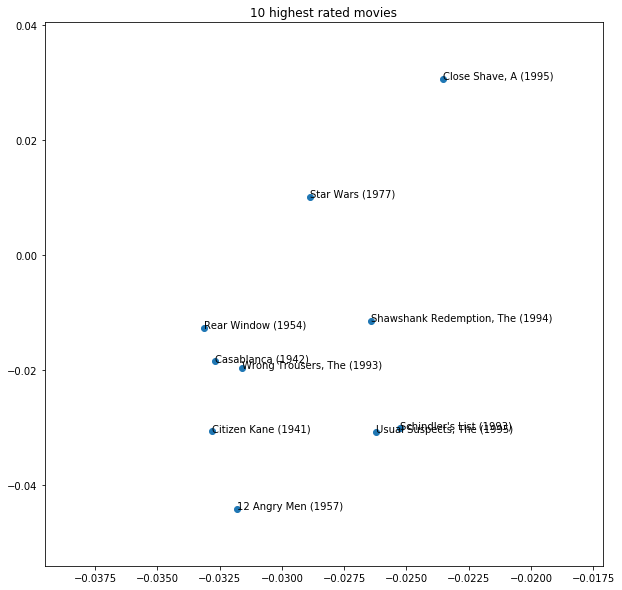

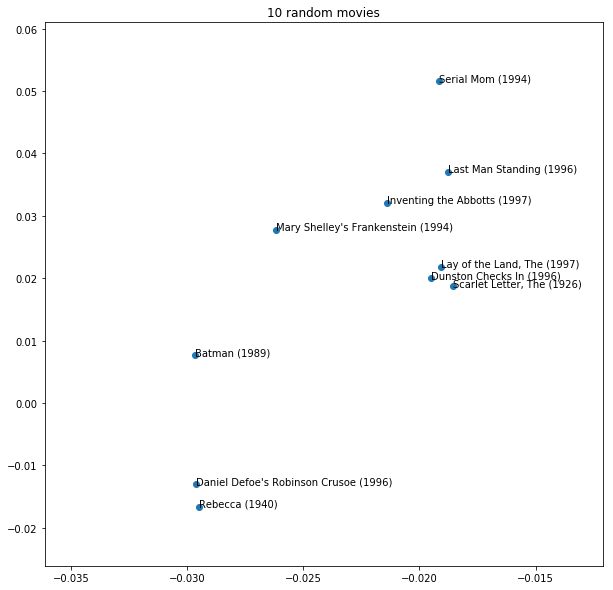

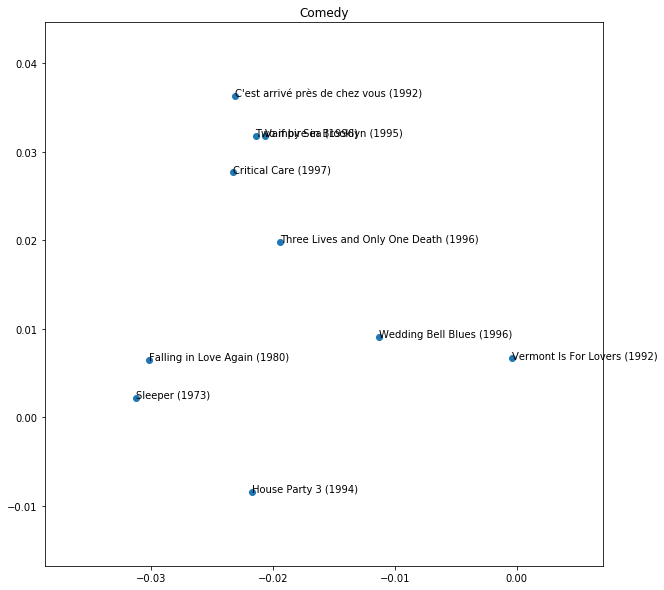

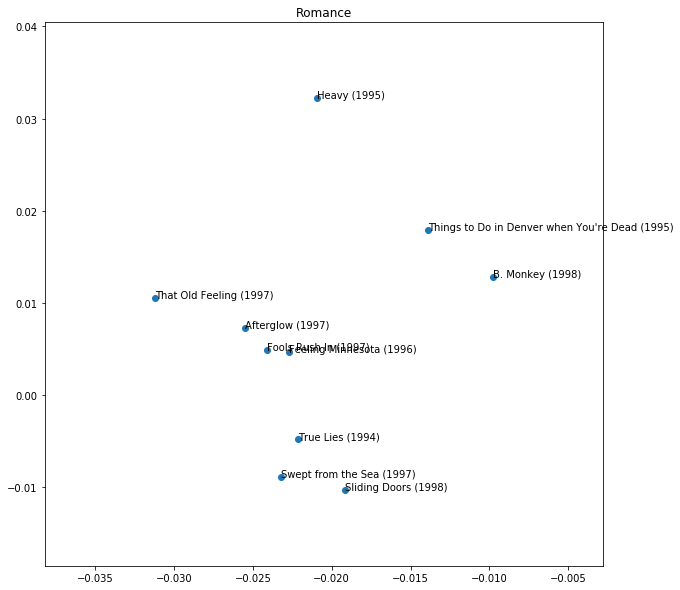

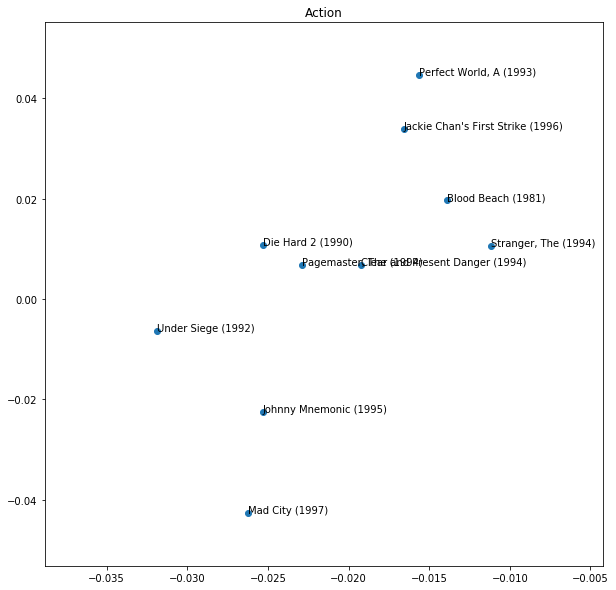

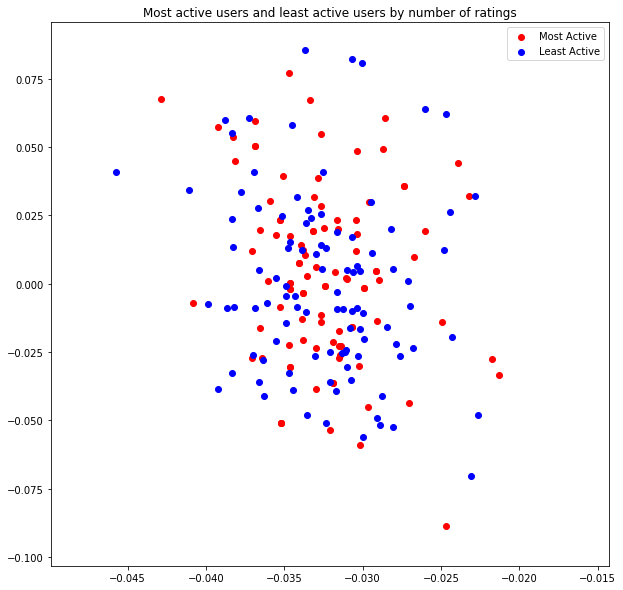

In [8]:
plot_all(U, V, "HW5_No_Bias")

In [9]:
E_in

0.30122801498567353

In [10]:
E_out

0.44955818303164125